In [ ]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [156]:
pathfire='/content/drive/My Drive/disaster_tweets.csv'


df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

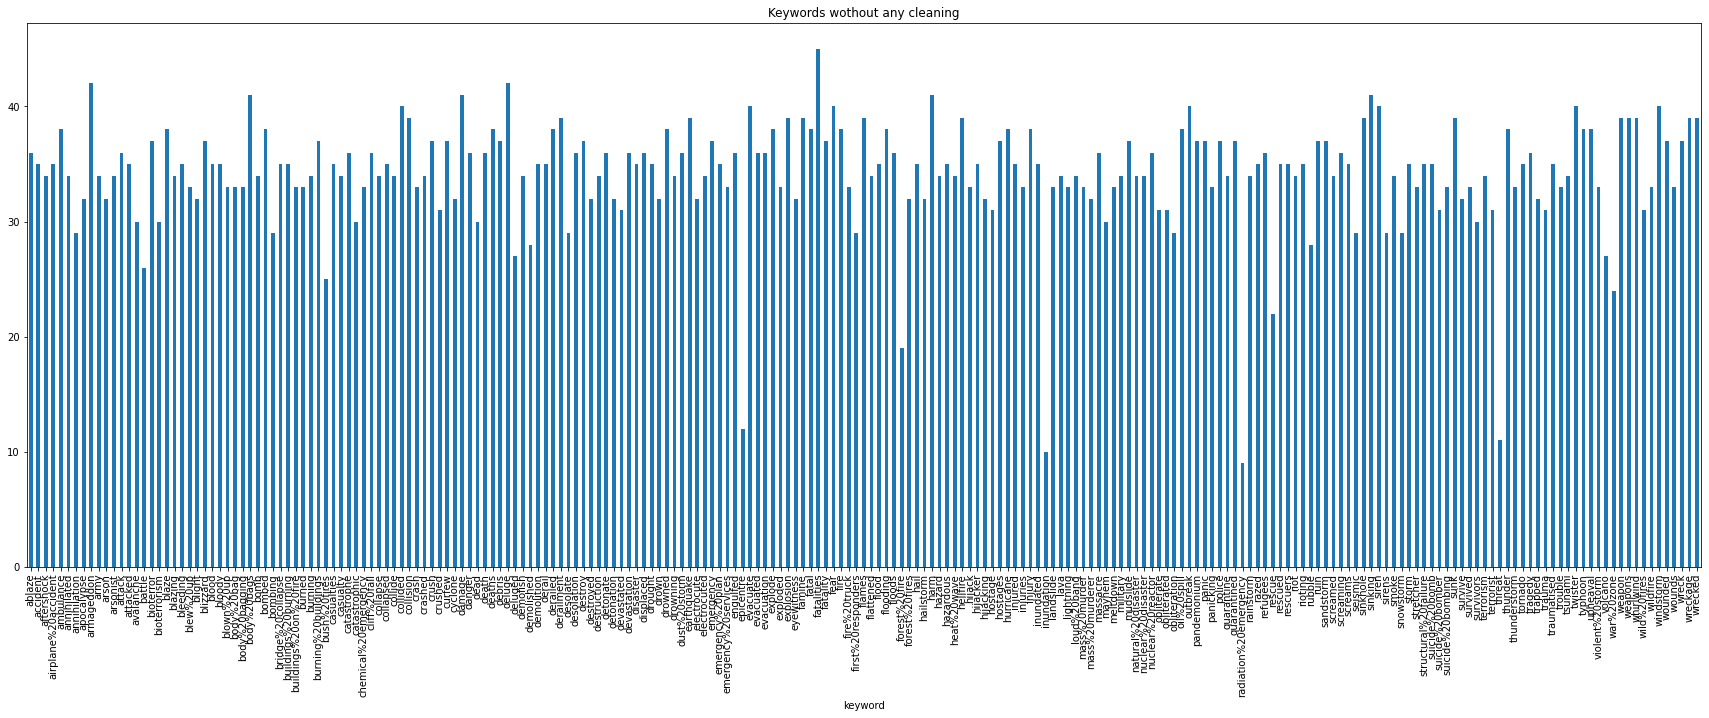

In [157]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

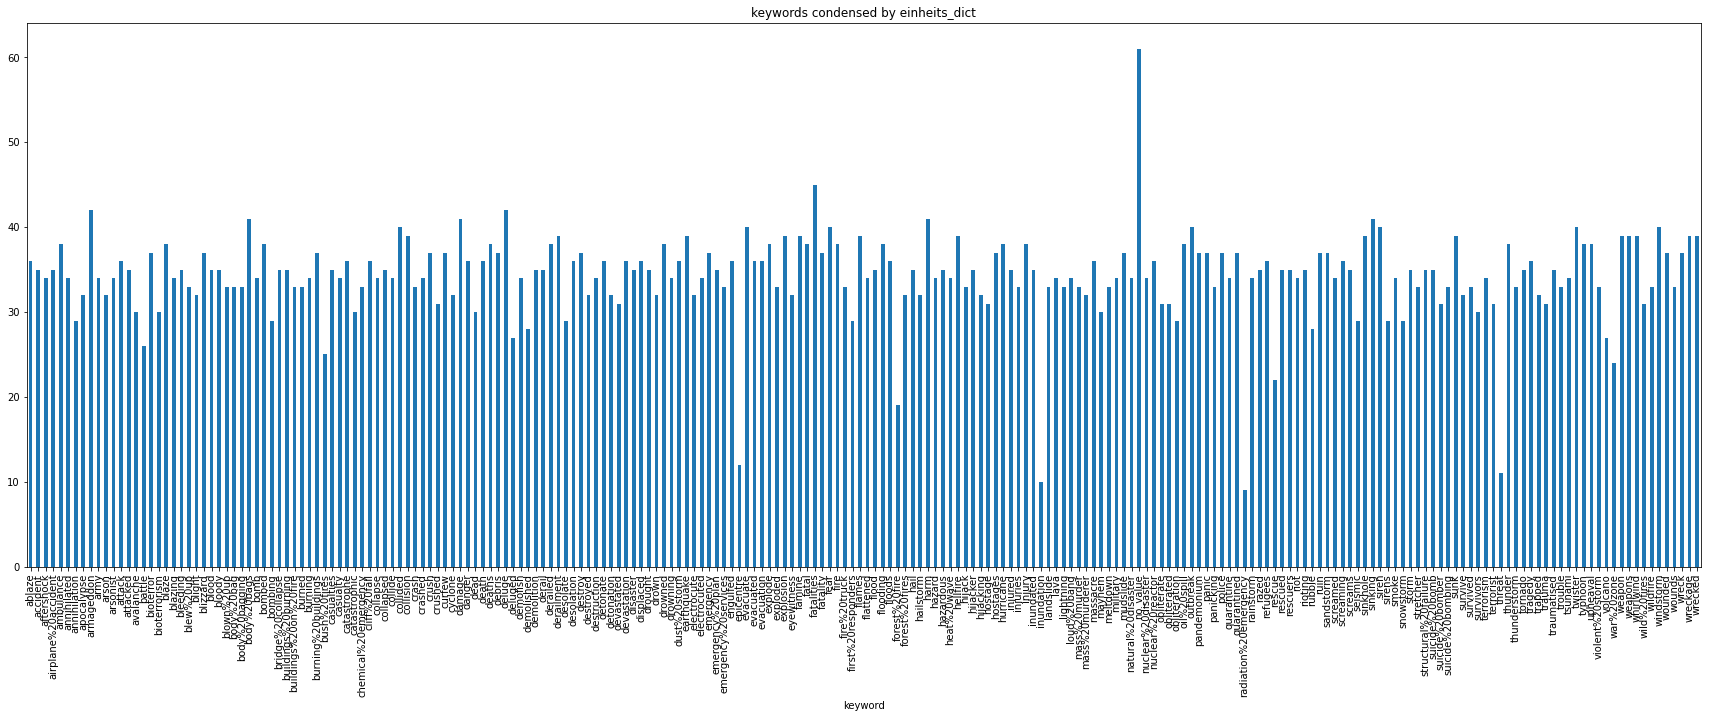

In [158]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

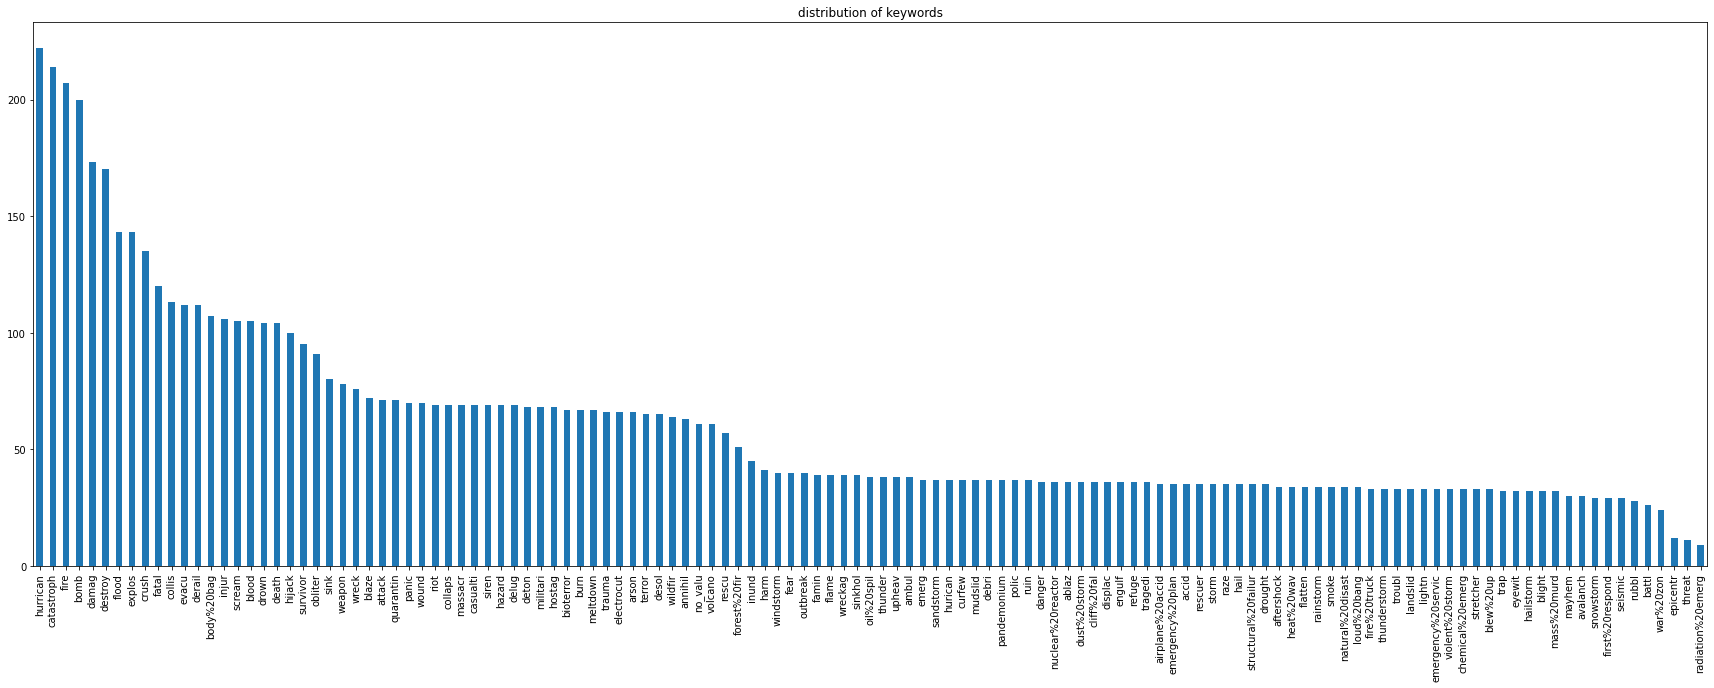

In [159]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

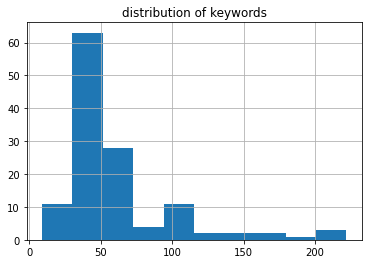

In [160]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

In [161]:
df.location.unique()

array(['no_value', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [162]:
df.location.nunique()

3342

In [163]:
df['location'].value_counts()

no_value                        2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Docker container                   1
Nigeria, Global                    1
buenos aires argentina             1
Cardiff, Wales                     1
Timaru District, New Zealand       1
Name: location, Length: 3342, dtype: int64

In [164]:
# no action for location until requested


### clean text

In [165]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [166]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [167]:

df['clean']=df['text'].apply(lambda text: clean_text(text))

In [168]:
'''
# tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

df['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))
'''

"\n# tokenize\n\ntokenizer = nltk.tokenize.WordPunctTokenizer()\n\ndf['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))\n"

In [169]:
df['clean']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to 'shelter in place' are ...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [170]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

In [171]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


In [172]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [173]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

0.78752052545156

0.7898193760262726

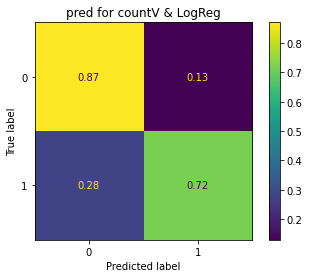

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

pipe_tfidf.fit(X_train, y_train)
plot_confusion_matrix(pipe_tfidf,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')

In [176]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cv_LR = cross_val_score(pipe_count, X_train, y_train).mean()
pipe_count.fit(X_train, y_train)
LR_Score = pipe_count.score(X_test, y_test)
s_predcit_LR = pipe_count.predict(X_test)

print(cv_LR, LR_Score )
pred_scores(pipe_count)

0.7898193760262726 0.814182534471438
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                         

In [177]:
kw_pure_alert_yes=df[df.target==1].groupby(['keyword']).count().sort_values('text',ascending=False)['text']
kw_pure_alert_no=df[df.target==0].groupby(['keyword']).count().sort_values('text',ascending=False)['text']
df_kw_pure=pd.DataFrame(columns=['alert_yes','alert_no'])
kw_sum=kw_pure_alert_no + kw_pure_alert_yes
print("Original keywords")
print("Anzahl keywords für Alert=yes",len(kw_pure_alert_yes))
print("Anzahl keywords für Alert=no",len(kw_pure_alert_no))
print("Alle keywords:",len(kw_sum))
for key in kw_sum.index:
  y=0
  n=0
  if key in kw_pure_alert_yes:
    y=kw_pure_alert_yes[key]
  if key in kw_pure_alert_no:
    n=kw_pure_alert_no[key]
  df_kw_pure.loc[key]=[y,n]
df_kw_pure.head(3)

Original keywords
Anzahl keywords für Alert=yes 221
Anzahl keywords für Alert=no 219
Alle keywords: 222


,alert_yes,alert_no
ablaze,13,23
accident,24,11
aftershock,0,34


,alert_yes,alert_no
ablaz,13,23
accid,24,11
aftershock,0,34


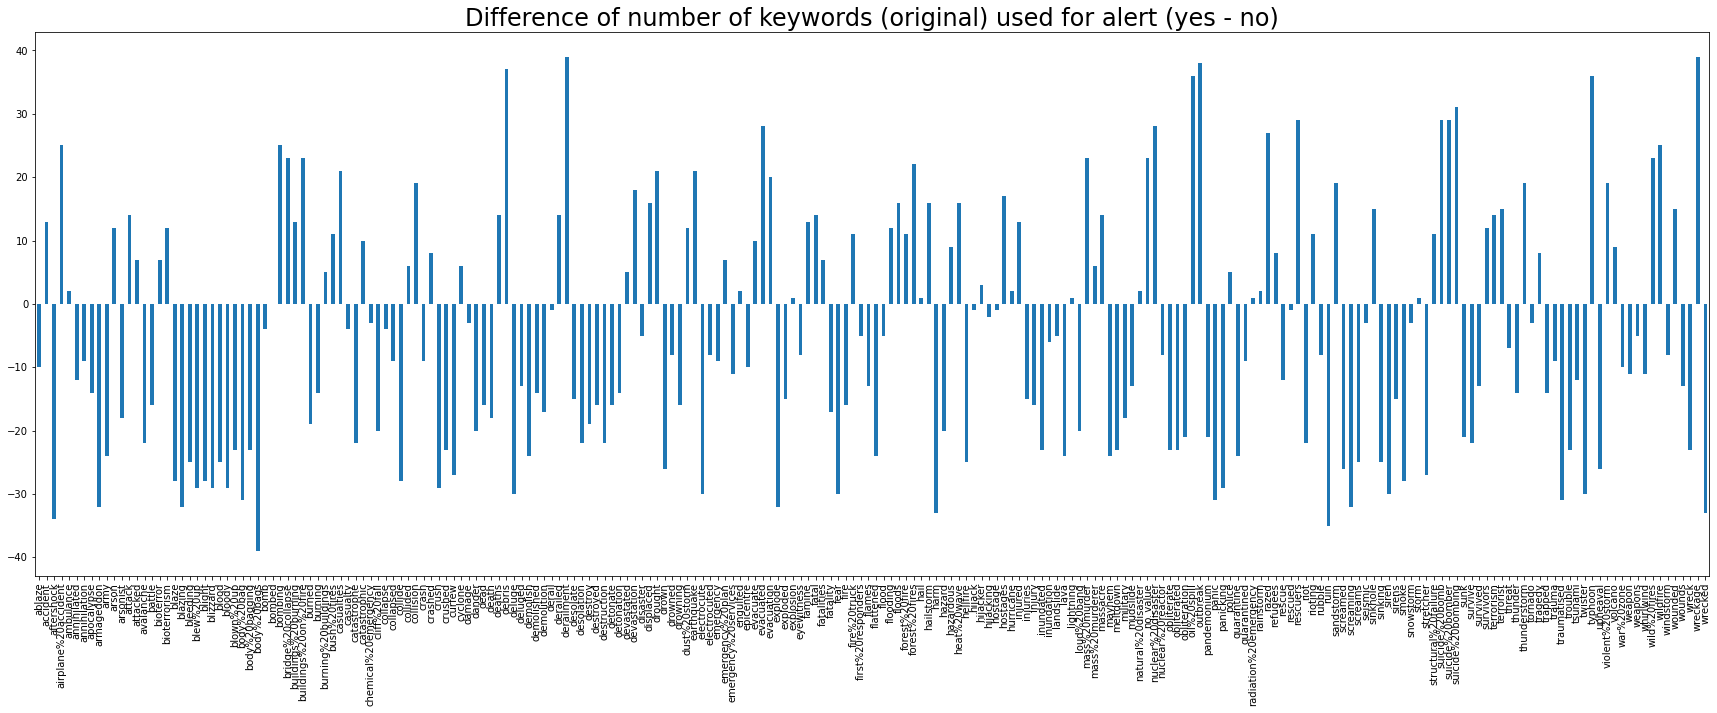

In [ ]:
plt.figure(figsize=(30,10))
df_kw_pure['diff']=df_kw_pure.alert_yes - df_kw_pure.alert_no
df_kw_pure['diff'].plot(kind='bar')
plt.title("Difference of number of keywords (original) used for alert (yes - no)",fontsize=24)
plt.show()

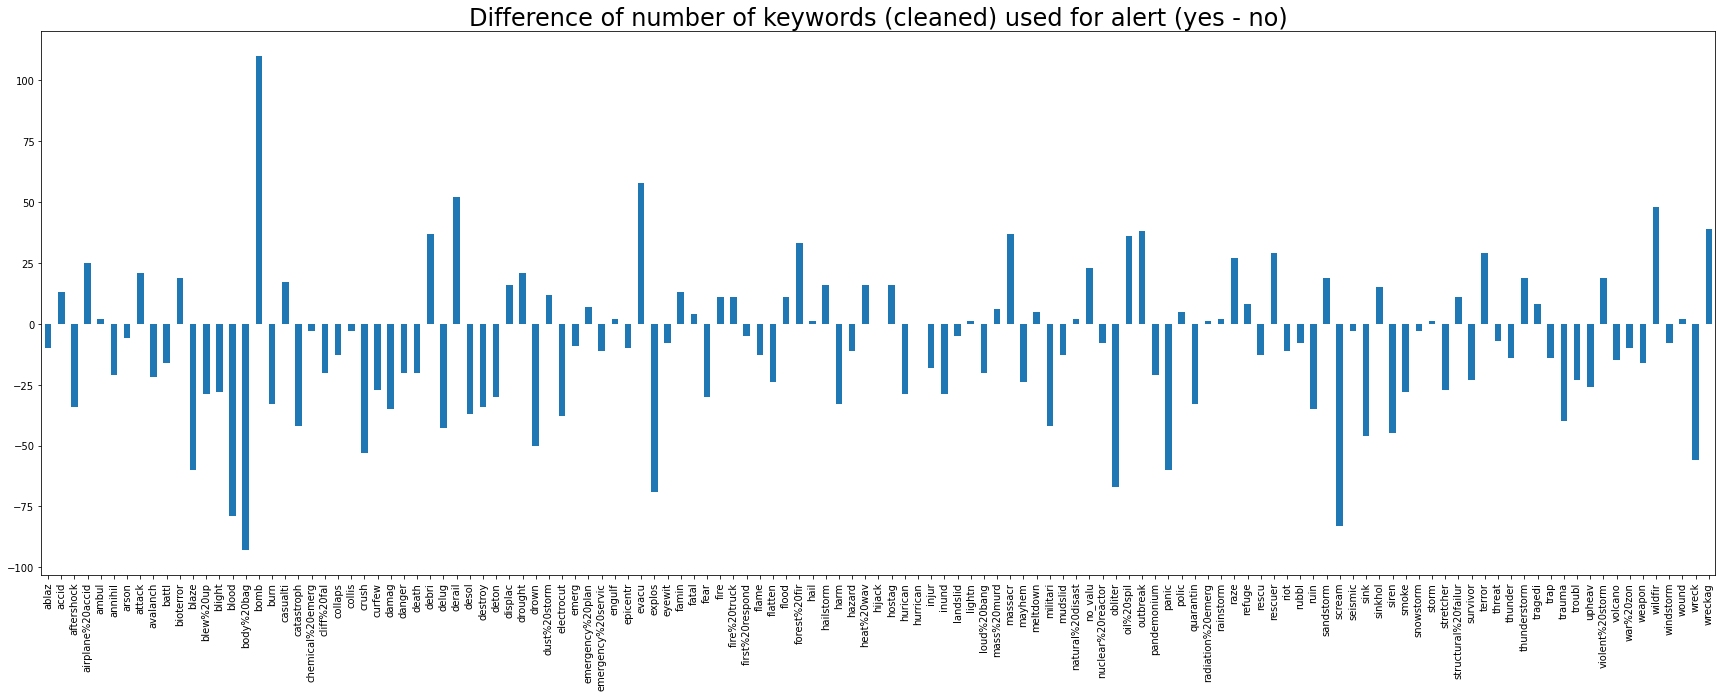

In [178]:
plt.figure(figsize=(30,10))
df_kw_final['diff']=df_kw_final.alert_yes - df_kw_final.alert_no
df_kw_final['diff'].plot(kind='bar')
plt.title("Difference of number of keywords (cleaned) used for alert (yes - no)", fontsize=24)
plt.show()

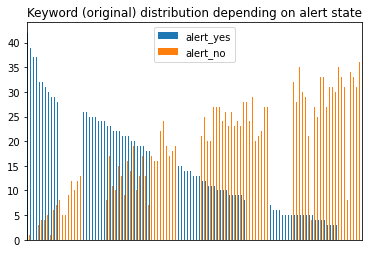

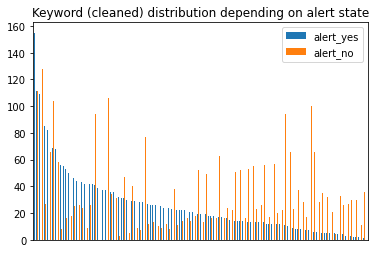

In [ ]:
df_kw_pure[['alert_yes','alert_no']].sort_values(by='alert_yes',ascending=False).plot(kind='bar')
plt.xticks([])
plt.title("Keyword (original) distribution depending on alert state")
plt.show()

### new approach: Day2

In [179]:
!pip install xgboost

,keyword,location,text,target,keyword_stem,keywords_final,clean
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...


### Verbesserung von KLassifikation durch Vektorisierung von Textblöcken

In [58]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

normal: ngram = 1; analyzer='word'

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vectorizer_0 = TfidfVectorizer(ngram_range=(1,1))
tfidf_matrix_0 = tfidf_vectorizer_0.fit_transform(X_train)
print(tfidf_vectorizer_0.get_feature_names(), tfidf_matrix_0[0])

['aa', 'aaaa', 'aaaaaaallll', 'aaarrrgghhh', 'aac', 'aag', 'aal', 'aamir', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aatt', 'aauizggc', 'ab', 'aba', 'abandon', 'abandonedp', 'abbandon', 'abbott', 'abbruchsimul', 'abbswinston', 'abbyairshow', 'abc', 'abcnew', 'abcnorio', 'abe', 'aberdeen', 'abgct', 'abha', 'abia', 'abil', 'abject', 'abl', 'ablaz', 'ableg', 'ablz', 'abninfvet', 'abnzqwlig', 'abomb', 'abomin', 'abort', 'about', 'abq', 'abran', 'absenc', 'absolut', 'abstorm', 'abstract', 'absurd', 'absurdli', 'abu', 'abus', 'abyhrgss', 'abysmaljoin', 'ac', 'acaciapenn', 'academia', 'acb', 'acc', 'accept', 'access', 'accf', 'accid', 'accident', 'accidents', 'accionempresa', 'accompani', 'accord', 'accordingli', 'account', 'accus', 'accustom', 'acd', 'acdelco', 'acdf', 'ace', 'acebab', 'acebreakingnew', 'acess', 'acfi', 'ach', 'achedin', 'achiev', 'achimota', 'acid', 'ackrrji', 'acmilan', 'acmrm', 'acn', 'acoust', 'acquir', 'acquisit', 'acr', 'acrgdqhj', 'acronym', 'across', 'acrrw', 'acryl', 

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf_0 = make_pipeline(tfidf_vectorizer_0,LogisticRegression())
cross_val_score(pipe_tfidf_0, X_train, y_train).mean()

[' ', "'", 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']   (0, 23)	0.058414812269476896
  (0, 7)	0.05389845747794621
  (0, 17)	0.1284421566136268
  (0, 11)	0.08070149196125964
  (0, 3)	0.10247235557786374
  (0, 14)	0.22053495894666728
  (0, 5)	0.08472048503550547
  (0, 10)	0.22671517842837194
  (0, 26)	0.12280242135285266
  (0, 13)	0.07899203202630782
  (0, 21)	0.30139411209158273
  (0, 20)	0.2802367584021325
  (0, 6)	0.2607474009296117
  (0, 15)	0.19518363140492992
  (0, 9)	0.20212893704330281
  (0, 0)	0.5082225222097202
  (0, 8)	0.09832474695951657
  (0, 2)	0.2982418594704718
  (0, 19)	0.265808409741885
  (0, 22)	0.1748979108838676
  (0, 16)	0.2251559926617687
  (0, 4)	0.08050506712575115


0.635303776683087

0.6963875205254515

In [181]:
import numpy as np

param_grid = {
    "XGB__n_estimators": [50, 100],
    "XGB__max_depth": [5, 10, 25],
    "XGB__reg_alpha": [1, 1.3, 2],
    "XGB__reg_lamba": [1, 1.3, 2],
    "XGB__subsample": np.arange(0.8, 1.1, 0.2)
}

POS

In [182]:
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])


#xgbc = XGBClassifier()
gridsearch = GridSearchCV(pipe, param_grid, verbose=1, n_jobs=-1)
gridsearch.fit(X_train, y_train)

gridsearch.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

CountVectorizer

Distributed Representations

In [184]:
from sklearn.model_selection import cross_val_score

def pred_scores(model):
  model.fit(X_train, y_train)
  print(f"Model: {model}\n")
  print(f"Training set score: {model.score(X_train, y_train)}")
  print(f"CV score          : {cross_val_score(model, X_train, y_train, cv=5).mean()}")

POS

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pipe_tfidf_DT = make_pipeline(CountVectorizer(),DecisionTreeClassifier())
cv_dt = cross_val_score(pipe_tfidf_DT, X_train, y_train).mean()
pipe_tfidf_DT.fit(X_train, y_train)
DT_Score = pipe_tfidf_DT.score(X_test, y_test)
s_predcit_DT = pipe_tfidf_DT.predict(X_test)

print(cv_dt, DT_Score)
pred_scores(pipe_tfidf_DT)

plot_confusion_matrix(rgridsearch,X_test,y_test, normalize='true')
plt.title('pred for tfidf & DT')

0.7522167487684728 0.7590282337491793
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...y=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
           

AttributeError: ignored

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
pipe_tfidf_KN = make_pipeline(CountVectorizer(),KNeighborsClassifier(n_neighbors=5))
cv_KN = cross_val_score(pipe_tfidf_KN, X_train, y_train).mean()

pipe_tfidf_KN.fit(X_train, y_train)

KN_Score = pipe_tfidf_KN.score(X_test, y_test)
s_predcit_KN = pipe_tfidf_KN.predict(X_test)

print(cv_KN, KN_Score)

pred_scores(pipe_tfidf_KN)

In [189]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


pipe_Bay = make_pipeline(TfidfVectorizer(), MultinomialNB(fit_prior=True))
cvs = cross_val_score(pipe_Bay, X_train, y_train).mean()
pipe_Bay.fit(X_train, y_train)

score_Bay = pipe_Bay.score(X_test, y_test)
s_predcit = pipe_Bay.predict(X_test)

print('Crossvalidation:', cvs, 'Test_Score', score_Bay)
print(pred_scores(pipe_Bay))

plot_confusion_matrix(pipe_Bay,X_test,y_test, normalize='true')
plt.title('pred for tfidf & NAIVE_Bayes')

Crossvalidation: 0.789655172413793 Test_Score 0.8168089297439265
Model: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=N

['tagger', 'parser', 'ner', 'textcat']

,keyword,location,text,target,keyword_stem,keywords_final,clean
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...
7608,no_value,no_value,Two giant cranes holding a bridge collapse int...,1,no_valu,no_valu,two giant crane hold bridg collaps nearbi home...
7609,no_value,no_value,@aria_ahrary @TheTawniest The out of control w...,1,no_valu,no_valu,aria ahrari thetawniest control wild fire cali...
7610,no_value,no_value,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,no_valu,no_valu,utc km volcano hawaii http co zdtoyd ebj
7611,no_value,no_value,Police investigating after an e-bike collided ...,1,no_valu,no_valu,polic investig e bike collid car littl portug ...


In [192]:
import pickle
filename = 'Bayes.sav'
model = pipe_Bay
pickle.dump(model, open(filename, 'wb'))

train, test = train_test_split(sent_df, test_size=0.1, random_state=42)
print(len(train))
print(len(test))

2943
328


In [ ]:
# falsch: nur positive ergebnisse
n_samples = 2000 # keeping it small here, because training can take a long time
train_sample = train.sample(n_samples).copy()
train_sample["target"].value_counts()

In [136]:
needed_train_data = [
                     ("THIS IS WHERE THE TWEET TEXT GOES", {"cats": {"POSITIVE": True, "NEGATIVE": False}})
]

In [ ]:
# first, compile the innermost dictionary, assigning True/False to each possible label
train_cats = [{"POSITIVE": v, "NEGATIVE": not v} for v in train_sample["target"]]
train_cats[:10]